## Import sklearn to extract tf-idf
- CountVectorizer() + TfidfTransformer()
- TfidfVectorizer()
"As tf–idf is very often used for text features, there is also another class called TfidfVectorizer that combines all the options of CountVectorizer and TfidfTransformer in a single model.
As you can see, TfidfVectorizer is a CountVectorizer followed by TfidfTransformer."


In [1]:
# import dataset

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all')
# import 10 news articles
news_data = twenty_train.data[:10]


In [2]:
# vectorize corpus
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(news_data)
# show the matrix of the vectorized corpus
X.toarray()
# show the unique terms (feature names)
feature_names = vectorizer.get_feature_names()

In [3]:
# count tf-idf of each term in the vectorized corpus
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(X)
tfidfArray = tfidf.toarray()

[(u'pens', 0.43280168447929529), (u'the', 0.29211105475772814), (u'bit', 0.21640084223964764), (u'of', 0.2133540325973512), (u'am', 0.18396048627999845)]
tfidf for article 1 is:


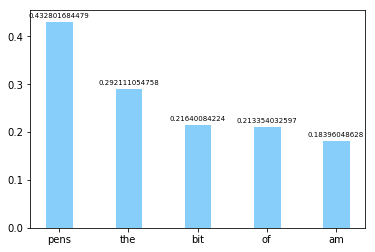

tfidf for article 2 is:


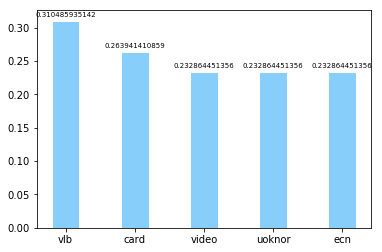

tfidf for article 3 is:


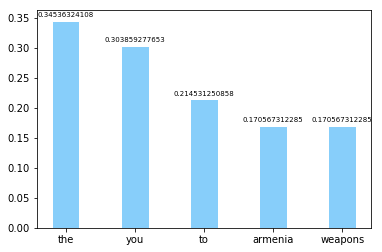

tfidf for article 4 is:


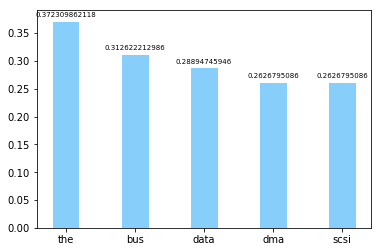

tfidf for article 5 is:


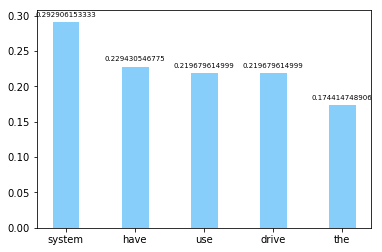

tfidf for article 6 is:


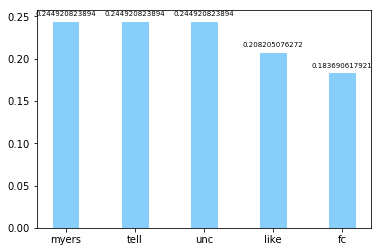

tfidf for article 7 is:


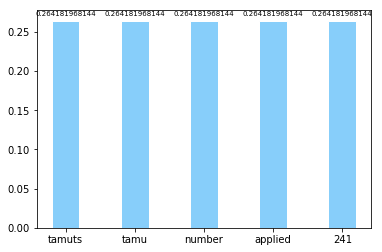

tfidf for article 8 is:


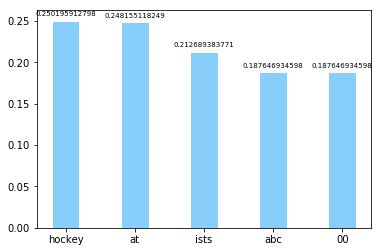

tfidf for article 9 is:


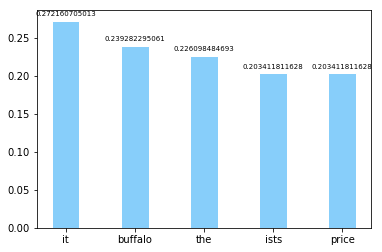

tfidf for article 10 is:


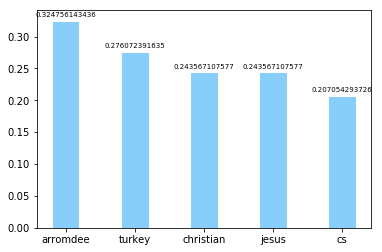

In [4]:
# view the top 5 terms of each news article based on the tfidf score

feature_names = vectorizer.get_feature_names()
li = []
tfidf = []
for l in tfidfArray:

    # sort tf-idf /How to explain this : ???
    #print [[feature_names[x],l[x]] for x in (l*-1).argsort()][:5]
    tfidf.append([(feature_names[x],l[x]) for x in (l*-1).argsort()][:5])
print tfidf[0]
# plot the result
import numpy as np
from matplotlib import pyplot as plt

def plotTfidf (li): # parameter li is a list of tfidf (top 5 words) in the news article. 
                    #e.g. [(u'pens', 0.43280168447929529), (u'the', 0.29211105475772814), (u'bit', 0.21640084223964764), (u'of', 0.2133540325973512), (u'am', 0.18396048627999845)]
    # plot tfidf of a given doc
    labels,Y = zip(*li) # See notes below
    X = np.arange(len(labels))
    plt.bar(X,Y,width = 0.4,facecolor = 'lightskyblue',edgecolor = 'white')  
    plt.xticks(X, labels)# stick labels on x axis
    for x,y in zip(X,Y):
        plt.text(x,y+0.005,y, ha='center', va= 'bottom',fontsize=7)
    plt.show()    

i = 0
for doc in tfidf:
    print "tfidf for article " + str(i+1) +" is:"
    plotTfidf(doc)
    i +=1   
    
# reference: https://stackoverflow.com/questions/28619595/how-to-get-top-terms-based-on-tf-idf-python

#### Notes for the cell above:
labels,Y = zip(*li)
- zip(*) 

The * in a function call "unpacks" a list (or other iterable), making each of its elements a separate argument.
Here, this function makes labels equal to the first elements in each turple, and Y equal to the second elements in each turple. 

Here, 
li = [(u'pens', 0.43280168447929529), (u'the', 0.29211105475772814), (u'bit', 0.21640084223964764), (u'of', 0.2133540325973512), (u'am', 0.18396048627999845)]

zip(* li) = [['pens','the','bit','of','am'],[0.43280168447929529, 0.29211105475772814, 0.21640084223964764, ...]]

So,
labels = ['pens','the','bit','of','am']
Y = [0.43280168447929529, 0.29211105475772814, 0.21640084223964764, ...]

In [114]:
# store tf-idf in the file
import os
import string

word = vectorizer.get_feature_names()
weight = tfidf.toarray()

sFilePath = './tfidffile'
if not os.path.exists(sFilePath) : 
    os.mkdir(sFilePath)
# 这里将每份文档词语的TF-IDF写入tfidffile文件夹中保存
for i in range(len(weight)) :
    print u"--------Writing all the tf-idf in the",i,u" file into ",sFilePath+'/'+string.zfill(i,5)+'.txt',"--------"
    f = open(sFilePath+'/'+string.zfill(i,5)+'.txt','w+')
    for j in range(len(word)) :
        f.write(word[j]+"    "+str(weight[i][j])+"\n")
    f.close()

AttributeError: 'list' object has no attribute 'toarray'

## Count tf-idf manually

reference: http://blog.csdn.net/baimafujinji/article/details/51476117

1. Preprocess text (tokenize, remove stopwords, stemming)

In [8]:
# import dataset

from sklearn.datasets import fetch_20newsgroups
twenty_train = fetch_20newsgroups(subset='all')
news_data = twenty_train.data[:10]


In [54]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *

stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

data = []
# remove punctuation when tokenizing
tokenizer = RegexpTokenizer(r'\w+') 

for text in news_data:
    lower = text.lower()
    # tokenize data
    tokens = tokenizer.tokenize(lower)
    filtered = []
    for w in tokens:
        if w not in stop_words:
            filtered.append(w)

    data.append(filtered)

# stemming
data_stemmed = []
data_tokens = []
for news_tokens in data:
    for token in news_tokens:
        for w in token:
            news_stemmed = stemmer.stem(token)
            data_tokens.append(news_stemmed)
        data_stemmed.append(data_tokens)

# count term frequency in each text
from collections import Counter
count = Counter(data_stemmed[0])
print (count.most_common(10))


[(u'organ', 120), (u'transfer', 100), (u'devic', 73), (u'subject', 70), (u'armenian', 69), (u'post', 69), (u'edu', 60), (u'univers', 60), (u'engin', 55), (u'perform', 55)]


### Define functions to count tf, idf, tfidf

In [51]:
def tf(word, count):
    return count[word] / sum(count.values())

def n_containing(word, count_list):
    return sum(1 for count in count_list if word in count)

def idf(word, count_list):
    return math.log(len(count_list) / (1 + n_containing(word, count_list)))

def tfidf(word, count, count_list):
    return tf(word, count) * idf(word, count_list)

In [ ]:
TODO:

reference: http://blog.csdn.net/liuxuejiang158blog/article/details/31360765